# Train-Test splitting

In [138]:

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
import pandas


from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


## MNIST dataset
Labeled dataset of handwritten digits for experiments in OCR (optical character recognition)

In [139]:
# https://www.openml.org/search?type=data&sort=runs&id=554&status=active
# https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

Size of the dataset: 70k items, 784 dimensions each

In [140]:
X.shape


(70000, 784)

In [141]:
X[0].shape


(784,)

Lets have a look at some random example.

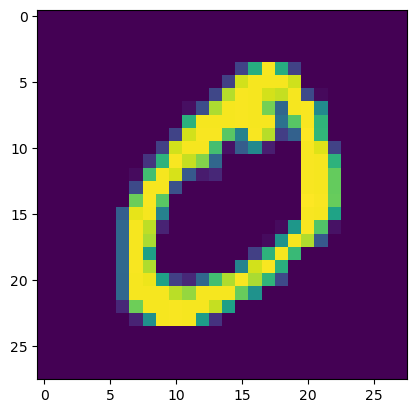

In [142]:
plt.imshow(X[1].reshape(28,28))


These are stored as brightness values for each pixel on a scale form 0-255

In [143]:
for row in X[1].reshape(28,28):
    print(' '.join([str(a).rjust(3) for a in row]))


  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253 159  50   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252 253 122   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 253 252 252  96 189 253 167   0   0   0   0 

Curiously - these are not stored as 2d arrays size 28x28, but vectors of length 784. And that is also how we are going to use them in our ML classifiers. We simply say, theres 784 dimensional input and throw the data at the model.

In [144]:
print(' '.join([str(a).rjust(3) for a in X[1]]))

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253 159  50   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252 253 122   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 253 252 252  96 189 253 167   0   0   0   0 

First, lets see hom many of each of the digits are there in the dataset. They are not equally distributed. 5's are the rarest, 1 the most common.

<Axes: >

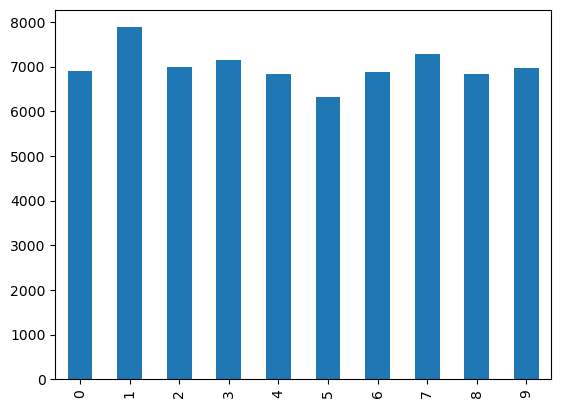

In [145]:
pandas.Series(y).value_counts().sort_index().plot(kind='bar')



For simplicity sake, we only want to have a binary classification problem, so we try to pick 1's and 7's apart.

In [146]:
index_sevens_and_ones = np.where((y == '7') | (y=='1'))[0]


In [147]:
Xb = X[index_sevens_and_ones]
yb = y[index_sevens_and_ones]



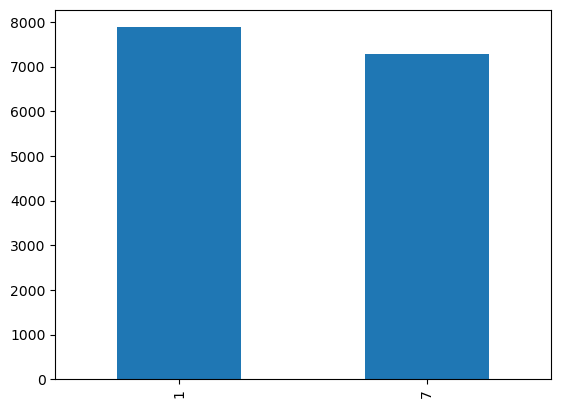

In [148]:
pandas.Series(yb).value_counts().sort_index().plot(kind='bar')
plt.show() 


## Classification model
Lets train a classifier to predict those and evaluate the predictions

In [161]:
clf = DecisionTreeClassifier(max_depth=6, random_state=42)
clf.fit(Xb, yb)
y_pred = clf.predict(Xb)
print(accuracy_score(yb, y_pred))
print(classification_report(yb, y_pred))

0.9958470665787739
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      7877
           7       1.00      1.00      1.00      7293

    accuracy                           1.00     15170
   macro avg       1.00      1.00      1.00     15170
weighted avg       1.00      1.00      1.00     15170



Ok, almost perfect. But it has see all of that data in training, what happens if we do a train-test-split and separate some data for testing before we start the training.

In [162]:
X_train, X_test, y_train, y_test = train_test_split(Xb, yb, test_size=0.1, random_state=19)
clf_n = DecisionTreeClassifier(max_depth=6, random_state=42)
clf_n.fit(X_train, y_train)
y_pred_n = clf_n.predict(X_test)
print(accuracy_score(y_test, y_pred_n))
print(classification_report(y_test, y_pred_n))


0.9866842452208305
              precision    recall  f1-score   support

           1       0.99      0.98      0.99      3972
           7       0.98      0.99      0.99      3613

    accuracy                           0.99      7585
   macro avg       0.99      0.99      0.99      7585
weighted avg       0.99      0.99      0.99      7585



Still good, but noticably worse than above.

**Exercise** *: Change the parameter random_state in the train_test_split method above (the split is done at random, and by changing this parameter you will get another random split, but most likely different than before), and rerun the training and evaluation.

**Exercise** *: Change the test_size parameter and rerun the experiment.